In [1]:
import pandas as pd
import numpy as np
import string
import nltk

from wordcloud import WordCloud, STOPWORDS #importing word cloud
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error # the main evaluation metric
from sklearn import metrics
from sklearn.model_selection import train_test_split #for splitting the data

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r"C:\Users\91901\Documents\Python\Twitter_ds\train.csv")
test = pd.read_csv(r"C:\Users\91901\Documents\Python\Twitter_ds\test.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt
train['tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*") 
test['tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*") 
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
#combining the unnamed columns to v2 and forming a new column 
#to basically get the whole message
train.fillna(' ',inplace = True)
test.fillna(' ',inplace = True)
train['tweet']=train['tweet'].str.strip() #removing the white spaces
test['tweet']=test['tweet'].str.strip() #removing the white spaces
train['tweet'] = train['tweet'].str.lower() # convert to lower case
test['tweet'] = test['tweet'].str.lower() # convert to lower case

#removing punctuation
p = string.punctuation
table = str.maketrans('','',p)
train['tweet'] = train['tweet'].apply(lambda x:x.translate(table))
test['tweet'] = test['tweet'].apply(lambda x:x.translate(table))

#tokenising each message
train['tokenwd']=train.apply(lambda x: x['tweet'].split(' '),axis=1)
test['tokenwd']=test.apply(lambda x: x['tweet'].split(' '),axis=1)

#removing stop words
stopwords = set(STOPWORDS)
train['cleanedt'] = train.apply(lambda x: [word for word in x['tokenwd'] if word not in stopwords],axis=1)
test['cleanedt'] = test.apply(lambda x: [word for word in x['tokenwd'] if word not in stopwords],axis=1)

In [12]:
#stemming 
ps = nltk.PorterStemmer()
train['stemed'] = train.apply(lambda x: [ps.stem(word) for word in x['cleanedt']],axis = 1)
test['stemed'] = test.apply(lambda x: [ps.stem(word) for word in x['cleanedt']],axis = 1)

#removing simgle letter
train['final_t'] = train.apply(lambda x: ' '.join([word for word in x['stemed']if len(word) > 1]),axis=1)
test['final_t'] = test.apply(lambda x: ' '.join([word for word in x['stemed']if len(word) > 1]),axis=1)

In [13]:
train.head()

,id,label,tweet,tokenwd,cleanedt,stemed,final_t
0,1,0,when a father is dysfunctional and is so selfi...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...",father dysfunct selfish drag kid dysfunct run
1,2,0,thanks for lyft credit i cant use cause they d...,"[thanks, for, lyft, credit, i, cant, use, caus...","[thanks, lyft, credit, cant, use, cause, dont,...","[thank, lyft, credit, cant, use, caus, dont, o...",thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]",bihday majesti
3,4,0,model i love u take with u all the time in u...,"[model, , , i, love, u, take, with, u, all, th...","[model, , , love, u, take, u, time, urð±, ð...","[model, , , love, u, take, u, time, urð±, ð...",model love take time urð± ðððð ð...
4,5,0,factsguide society now motivation,"[factsguide, society, now, , , , motivation]","[factsguide, society, now, , , , motivation]","[factsguid, societi, now, , , , motiv]",factsguid societi now motiv


In [15]:
train['final_t'] = train['final_t'].str.replace("[^a-zA-Z#]", " ")
test['final_t'] = test['final_t'].str.replace("[^a-zA-Z#]", " ")

In [16]:
#dropping every column except what we need , v1 and final_t
train.drop(['tokenwd','cleanedt','stemed','id'],axis=1).head()

,label,tweet,final_t
0,0,when a father is dysfunctional and is so selfi...,father dysfunct selfish drag kid dysfunct run
1,0,thanks for lyft credit i cant use cause they d...,thank lyft credit cant use caus dont offer whe...
2,0,bihday your majesty,bihday majesti
3,0,model i love u take with u all the time in u...,model love take time ur ...
4,0,factsguide society now motivation,factsguid societi now motiv


In [17]:
test.drop(['tokenwd','cleanedt','stemed','id'],axis=1).head()

,tweet,final_t
0,studiolife aislife requires passion dedication...,studiolif aislif requir passion dedic willpow ...
1,white supremacists want everyone to see the ne...,white supremacist want everyon see new bir...
2,safe ways to heal your acne altwaystoheal h...,safe way heal acn altwaystoh healthi heal
3,is the hp and the cursed child book up for res...,hp curs child book reserv alreadi ye ...
4,3rd bihday to my amazing hilarious nephew eli ...,rd bihday amaz hilari nephew eli ahmir uncl d...


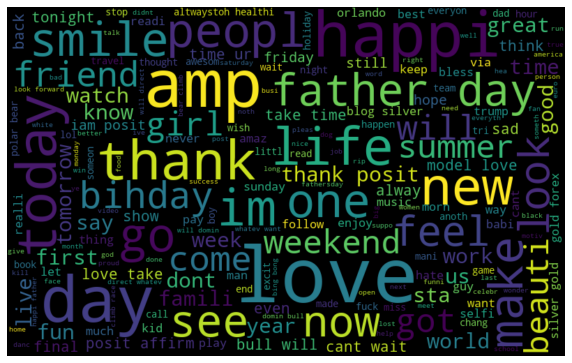

In [19]:
all_words = ' '.join([text for text in train['final_t']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
predictor = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
x = predictor.fit_transform(train['final_t']).toarray()
x.shape

(31962, 1000)

In [24]:
y=train['label']
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1, solver='liblinear').fit(x,y)
print("------------------LOGISTIC REGRESSION---------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y, LR.predict(x)))

------------------LOGISTIC REGRESSION---------------------
Train set Accuracy:  0.9517239221575621


In [29]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DTree.fit(x,y)
from sklearn import metrics
print("-----------------DECISION TREE CLASSIFIER---------------------")
print("Train set Accuracy: ", metrics.accuracy_score(y, DTree.predict(x)))

-----------------DECISION TREE CLASSIFIER---------------------
Train set Accuracy:  0.9461235216819974


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x,y)
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y, rf_model.predict(x)))

C:\Users\91901\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
